In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Load the dataset
file_path = '../Project-04/Air_Quality_20240801.csv'
data = pd.read_csv(file_path)

# List unique values in the 'Name' column
unique_names = data['Name'].unique()
print(unique_names)


['Boiler Emissions- Total SO2 Emissions' 'Fine particles (PM 2.5)'
 'Nitrogen dioxide (NO2)'
 'Asthma emergency department visits due to PM2.5'
 'Annual vehicle miles traveled'
 'Respiratory hospitalizations due to PM2.5 (age 20+)' 'Ozone (O3)'
 'Asthma hospitalizations due to Ozone'
 'Boiler Emissions- Total NOx Emissions'
 'Boiler Emissions- Total PM2.5 Emissions'
 'Outdoor Air Toxics - Formaldehyde'
 'Asthma emergency departments visits due to Ozone'
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)'
 'Cardiac and respiratory deaths due to Ozone' 'Deaths due to PM2.5'
 'Outdoor Air Toxics - Benzene' 'Annual vehicle miles traveled (trucks)'
 'Annual vehicle miles traveled (cars)']


c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


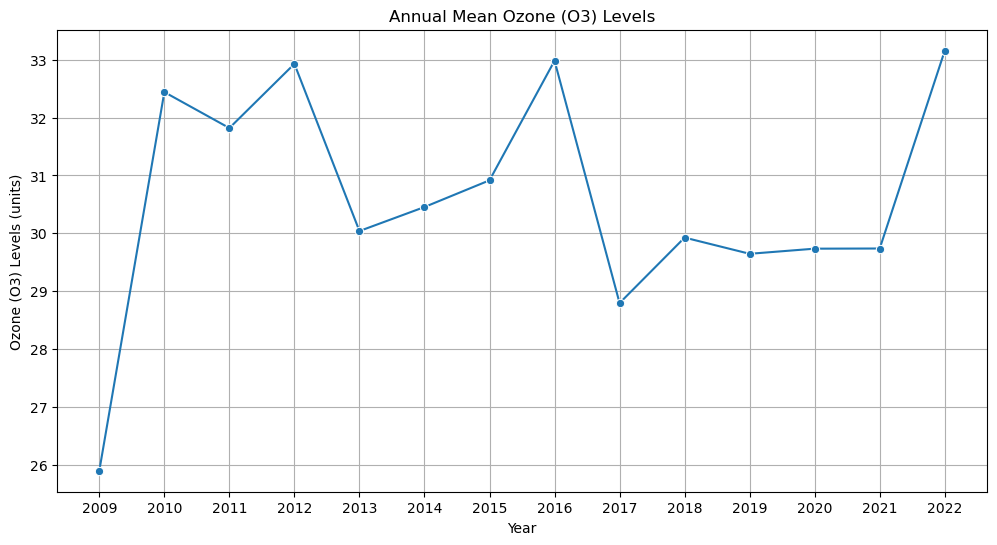

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


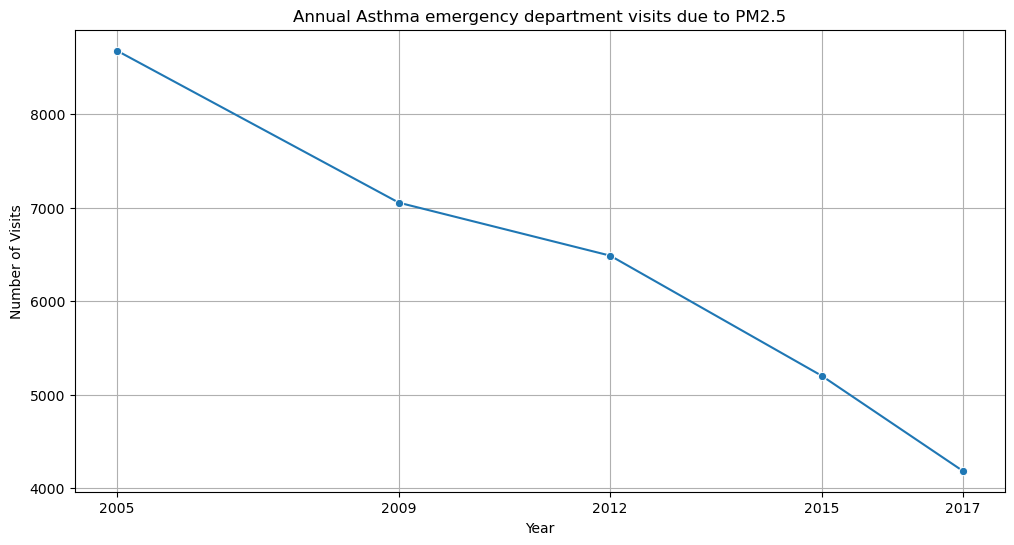

Correlation coefficient between Asthma emergency department visits due to PM2.5 and Ozone (O3): -0.15746690692319215
P-value: 0.8425330930768078


In [2]:

def analyze_indicator(asthma_indicator, pollution_indicator):
    # Filter the dataset for relevant indicators
    asthma_visits = data[data['Name'] == asthma_indicator].copy()
    pollution_data = data[data['Name'] == pollution_indicator].copy()

    # Convert the 'Start_Date' column to datetime format
    asthma_visits['Start_Date'] = pd.to_datetime(asthma_visits['Start_Date'], errors='coerce')
    pollution_data['Start_Date'] = pd.to_datetime(pollution_data['Start_Date'], errors='coerce')

    # Drop rows with invalid dates
    asthma_visits = asthma_visits.dropna(subset=['Start_Date'])
    pollution_data = pollution_data.dropna(subset=['Start_Date'])

    # Aggregate data by year
    asthma_visits['Year'] = asthma_visits['Start_Date'].dt.year.astype(int)
    pollution_data['Year'] = pollution_data['Start_Date'].dt.year.astype(int)

    # Calculate annual mean pollution levels and total asthma visits
    annual_pollution = pollution_data.groupby('Year')['Data Value'].mean().reset_index()
    annual_asthma = asthma_visits.groupby('Year')['Data Value'].sum().reset_index()

    # Convert infinite values to NaN
    annual_pollution['Data Value'].replace([np.inf, -np.inf], np.nan, inplace=True)
    annual_asthma['Data Value'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values after conversion
    annual_pollution.dropna(subset=['Data Value'], inplace=True)
    annual_asthma.dropna(subset=['Data Value'], inplace=True)

    # Plot annual pollution levels
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Data Value', data=annual_pollution, marker='o')
    plt.title(f'Annual Mean {pollution_indicator} Levels')
    plt.xlabel('Year')
    plt.ylabel(f'{pollution_indicator} Levels (units)')
    plt.grid(True)
    plt.xticks(annual_pollution['Year'])  # Ensure x-axis ticks are integers
    plt.show()

    # Plot annual asthma emergency department visits
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Data Value', data=annual_asthma, marker='o')
    plt.title(f'Annual {asthma_indicator}')
    plt.xlabel('Year')
    plt.ylabel('Number of Visits')
    plt.grid(True)
    plt.xticks(annual_asthma['Year'])  # Ensure x-axis ticks are integers
    plt.show()

    # Save the processed data for Tableau
    annual_pollution.to_csv(f'../Project-04/Annual_{pollution_indicator.replace(" ", "_").replace("(", "").replace(")", "")}.csv', index=False)
    annual_asthma.to_csv(f'../Project-04/Annual_{asthma_indicator.replace(" ", "_").replace("(", "").replace(")", "")}.csv', index=False)

    # Merge the datasets on 'Year' to prepare for correlation analysis
    merged_data = pd.merge(annual_asthma, annual_pollution, on='Year', suffixes=('_asthma', f'_{pollution_indicator.replace(" ", "_").replace("(", "").replace(")", "")}'))

    # Check if there are at least two data points for correlation calculation
    if len(merged_data) >= 2:
        # Calculate the correlation coefficient
        correlation, p_value = pearsonr(merged_data['Data Value_asthma'], merged_data[f'Data Value_{pollution_indicator.replace(" ", "_").replace("(", "").replace(")", "")}'])
        print(f"Correlation coefficient between {asthma_indicator} and {pollution_indicator}: {correlation}")
        print(f"P-value: {p_value}")
    else:
        print(f"Not enough data points for correlation analysis between {asthma_indicator} and {pollution_indicator}")

# Example call for one indicator pair
analyze_indicator('Asthma emergency department visits due to PM2.5', 'Ozone (O3)')


c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


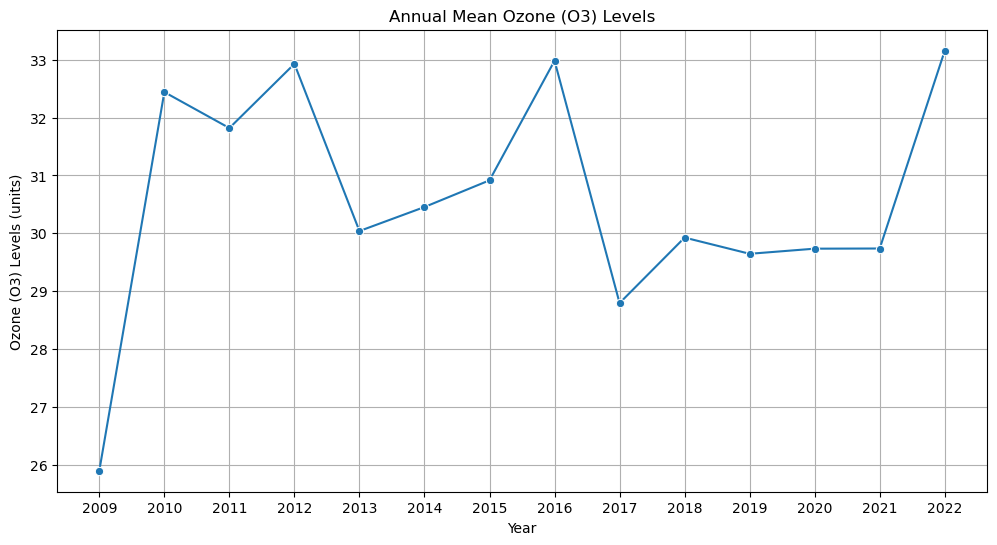

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


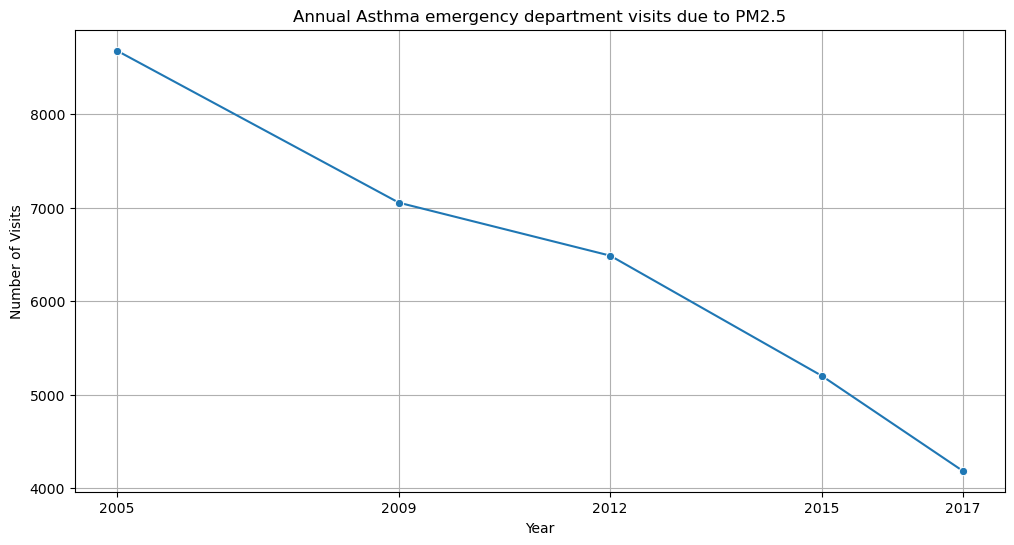

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Correlation coefficient between Asthma emergency department visits due to PM2.5 and Ozone (O3): -0.15746690692319215
P-value: 0.8425330930768078


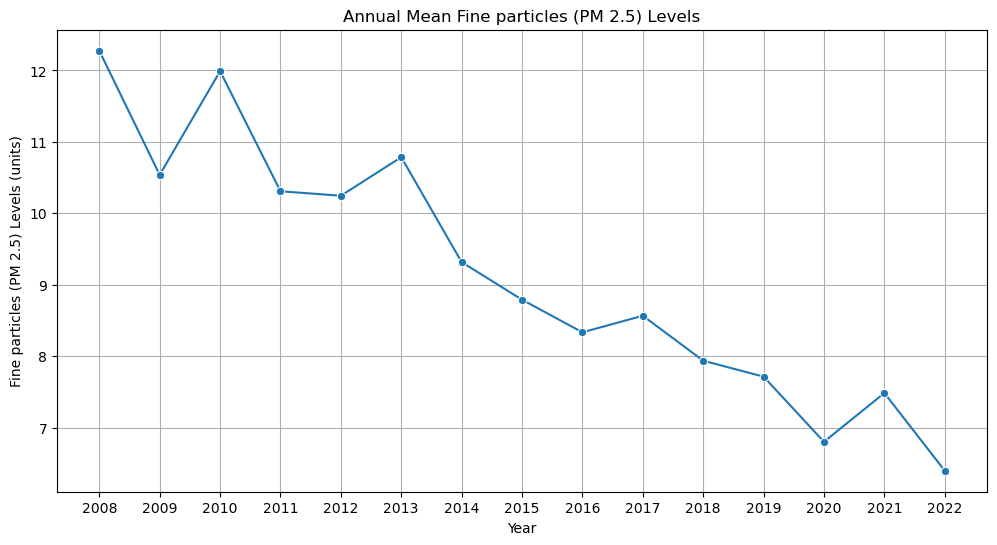

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


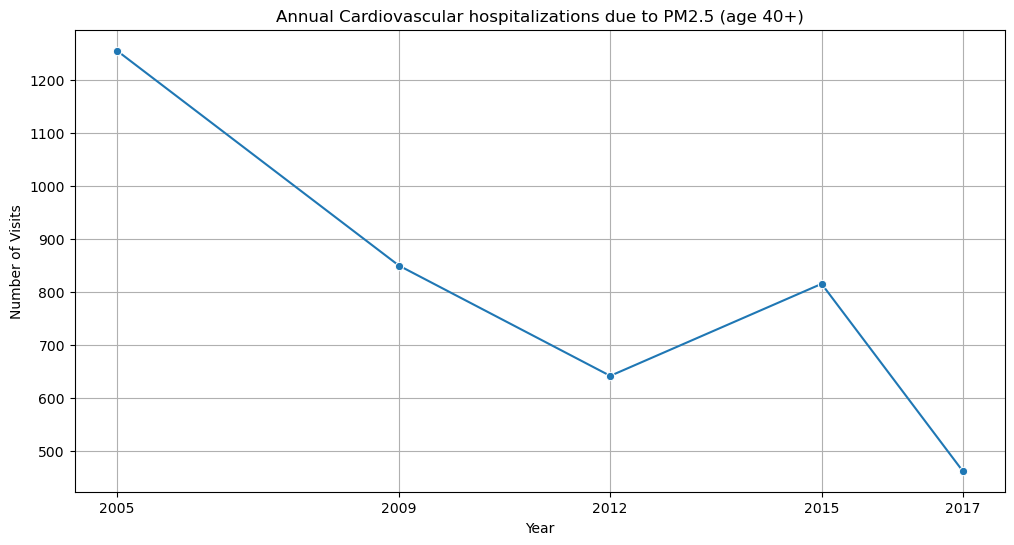

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Correlation coefficient between Cardiovascular hospitalizations due to PM2.5 (age 40+) and Fine particles (PM 2.5): 0.47273468536104196
P-value: 0.5272653146389581


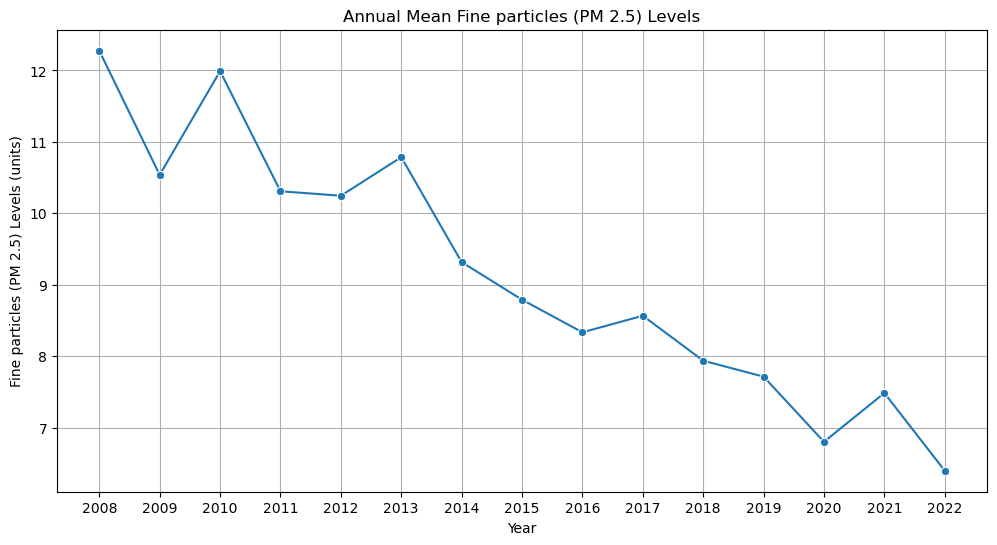

c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\melkabas\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


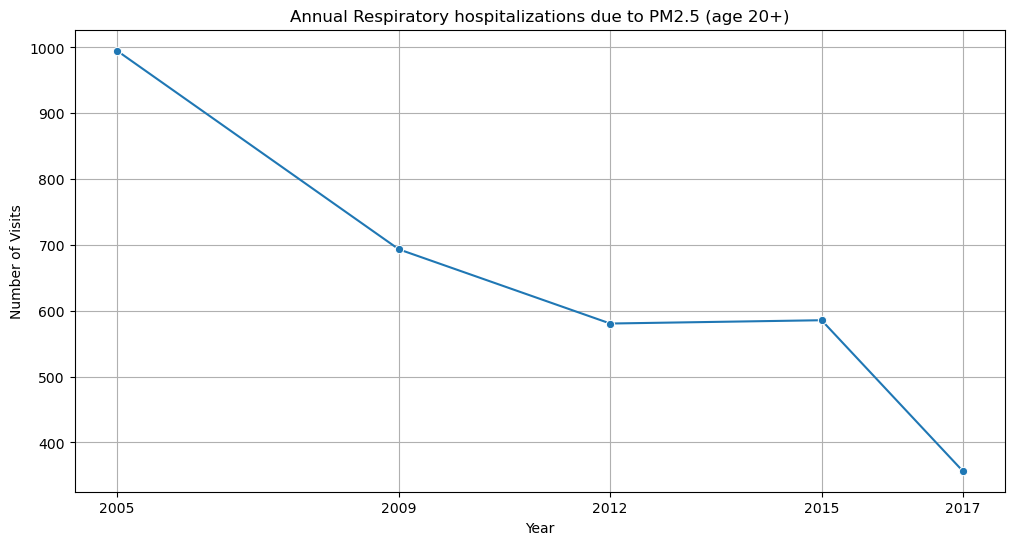

Correlation coefficient between Respiratory hospitalizations due to PM2.5 (age 20+) and Fine particles (PM 2.5): 0.768271232272083
P-value: 0.23172876772791695


In [3]:
# Question 1: How do asthma emergency department visits correlate with Ozone levels in different neighborhoods?
analyze_indicator('Asthma emergency department visits due to PM2.5', 'Ozone (O3)')

# Question 2: What is the relationship between PM 2.5 levels and cardiovascular hospitalizations (age 40+) across NYC?
analyze_indicator('Cardiovascular hospitalizations due to PM2.5 (age 40+)', 'Fine particles (PM 2.5)')

# Question 3: Analyze the correlation between respiratory hospitalizations (age 20+) and PM 2.5 levels.
analyze_indicator('Respiratory hospitalizations due to PM2.5 (age 20+)', 'Fine particles (PM 2.5)')
